In [4]:
import numpy as np
import matplotlib as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

#Split the dataset into training and testing datasets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 42)

svm_model= SVC(kernel ='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

def plot_decision_boundry(X,y, model):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='coolware', marker='o', edgecolors='k')
    ax= plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z= model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors = 'k', levels={-1,0,1}, alpha = 0.5,
    linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=100,
    linewidth=1, facecolors='none', edgecolor='k')

    plt.xlabel("feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Accuracy: 1.00


In [10]:
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)

# Define model
model = RandomForestClassifier()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X, y, cv=kf)
print("K-Fold Scores:", kf_scores)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, X, y, cv=skf)
print("Stratified K-Fold Scores:", skf_scores)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    print("Train:", train_index, "Test:", test_index)

# Hold-Out Method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print("Hold-Out Test Accuracy:", model.score(X_test, y_test))


K-Fold Scores: [1.   0.85 0.9  0.95 0.95]
Stratified K-Fold Scores: [1.   0.95 0.85 0.9  1.  ]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] Test: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] Test: [52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67] Test: [68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 3

Accuracy: 1.00


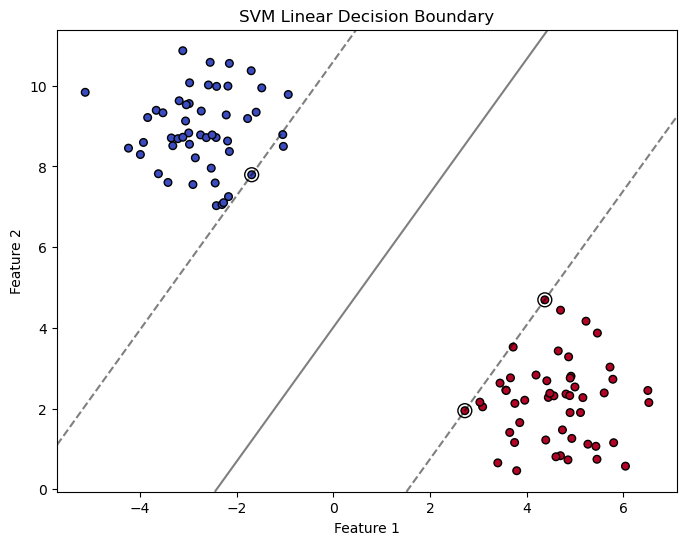

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm', marker='o', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.title("SVM Linear Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, svm_model)


In [ ]:
import numpy as np
import matplotlib as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

#Split the dataset into training and testing datasets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 42)

svm_model= SVC(kernel ='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

def plot_decision_boundry(X,y, model):
    plt.figure(figsize=(8,6))
    
    plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='coolware', marker='o', edgecolors='k')
    ax= plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z= model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors = 'k', levels={-1,0,1}, alpha = 0.5,
    linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=100,
    linewidth=1, facecolors='none', edgecolor='k')

    plt.xlabel("feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    plot_decision_boundry(X,y,svm_model)

Accuracy: 1.00


Accuracy: 1.00


ValueError: 'coolware' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

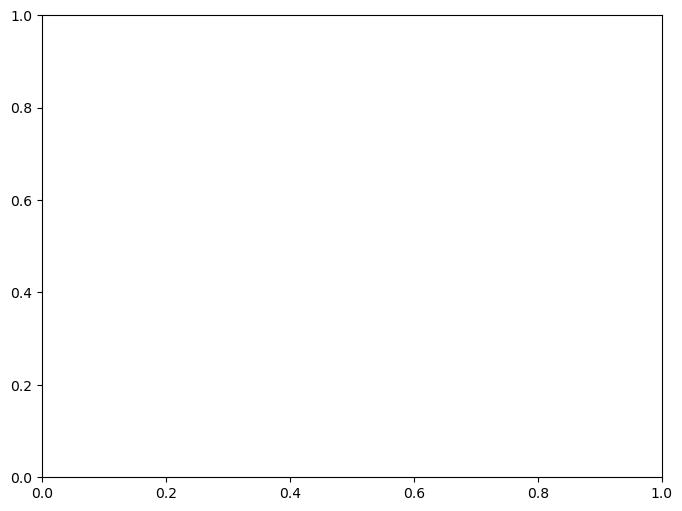

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

#Split the dataset into training and testing datasets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 42)

svm_model= SVC(kernel ='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

def plot_decision_boundary(X,y, model):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='coolware', marker='o', edgecolors='k')
    ax= plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z= model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors = 'k', levels={-1,0,1}, alpha = 0.5,
    linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=100,
    linewidth=1, facecolors='none', edgecolor='k')

    plt.title("SVM linear decision boundry")
    plt.xlabel("feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X,y, svm_model)
